<a href="https://colab.research.google.com/github/mtlangschwager/Matrix_SQL/blob/main/Project_2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import seaborn as sns


MNIST_data_train = pd.read_csv('/content/drive/MyDrive/Data Folder/MNIST_train.csv', index_col ="index")
MNIST_data_test = pd.read_csv('/content/drive/MyDrive/Data Folder/MNIST_test.csv', index_col = "index")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MNIST_data_train
#data

Sort the dataset into "X" and "y" categories, and normalize the "X" data to a scale of 0 to 1.

In [29]:
X = MNIST_data_train.to_numpy()
y_train = X[:, 1]
X_train = X[:, 2:]
X_train = X_train / 255


In [7]:
X = MNIST_data_test.to_numpy()
y_test = X[:, 1]
X_test = X[:, 2:]
X_test = X_test / 255

In [ ]:
X_train[10]

Naive Bayes algorithm

In [9]:
class GaussNB():
  def fit(self, X, y, epsilon=2e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))
    
    for k in self.K:
      X_k = X[y == k, :]
      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)
  

In [10]:
gnb = GaussNB()
gnb.fit(X_train,y_train)
y_hat_train = gnb.predict(X_train)



In [11]:
def accuracy(y, y_hat):
  return np.mean(y == y_hat)

In [12]:
accuracy(y_train, y_hat_train)

0.78075

In [13]:
y_hat_test = gnb.predict(X_test)

In [14]:
accuracy(y_test, y_hat_test)

0.7904

Gaussian Bayes algorithm

In [15]:
from operator import matmul
class GaussBayes():
#We are no longer assuming independence of data!

  def fit(self, X, y, epsilon = 2e-3):

    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y == k, :]
      N_k,D = X_k.shape  #extracting dimensions from 'shape'
      mu_k = X_k.mean(axis = 0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": (1/(N_k - 1)) * np.matmul((X_k-mu_k).T, X_k - mu_k) + epsilon * np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N,D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis = 1)


  #P_hat = selecting from the probability of all class
  #Y_hat = selecting the max

In [16]:
gbayes = GaussBayes()

In [17]:
gbayes.fit(X_train, y_train)

In [18]:
y_hat_gb = gbayes.predict(X_train)

In [19]:
y_hat_gb_test = gbayes.predict(X_test)

In [20]:
y_hat_gb_test

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
accuracy(y_train, y_hat_gb)

0.9397166666666666

In [22]:
accuracy(y_test, y_hat_gb_test)

0.924

Plot confusion matrices, both to see the (quantitative) success rate and to observe where the program may be falling short.

Text(0.5, 60.0, 'Predicted Label')

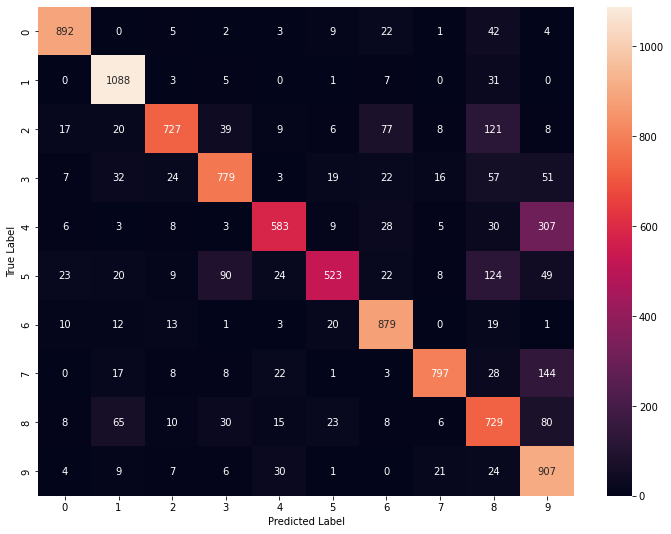

In [23]:
plt.figure(figsize = (12, 9))
y_actu = pd.Series(y_test, name = "Actual")
y_pred = pd.Series(y_hat_test, name = "Predicted")
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot = True, fmt = "d")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 60.0, 'Predicted Label')

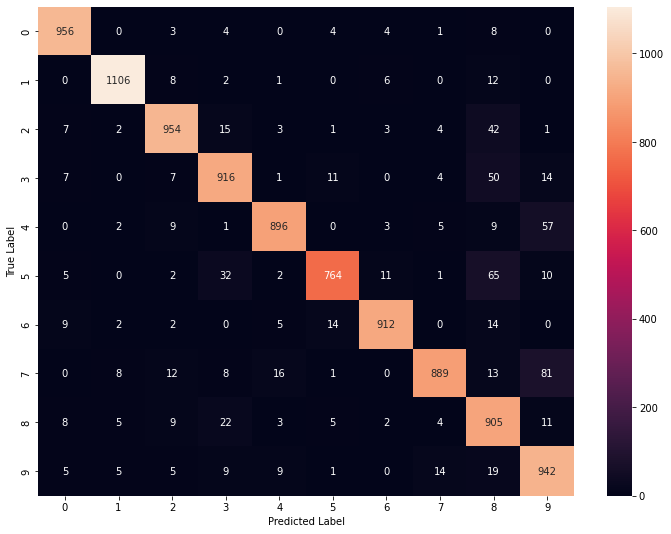

In [24]:
plt.figure(figsize = (12, 9))
y_actu = pd.Series(y_test, name = "Actual")
y_pred = pd.Series(y_hat_gb_test, name = "Predicted")
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot = True, fmt = "d")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [25]:
F_matrix_y = np.arange(10)
F_matrix_y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Visualization of any X_train character

In [26]:
X_train1 = X_train.reshape(60000, 28, 28)

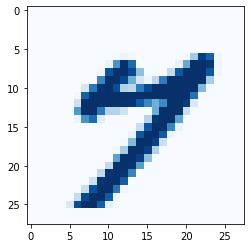

In [27]:
#X
#y

sample = 1001
image = X_train1[sample]
fig = plt.figure()
plt.imshow(image, cmap = 'Blues')
#plt.hist(X[y==1,0], alpha=0.5, bins=30)
#plt.hist(X[y==0,0], alpha=0.5, bins=30)
plt.show()

Analysis of y_train data

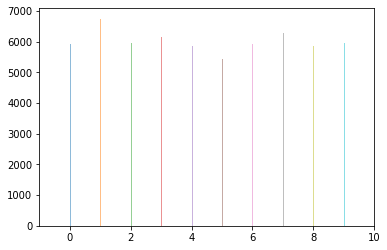

In [30]:
plt.figure()
plt.hist(X[y_train==0,1], label="0", alpha=0.5, bins=30)
plt.hist(X[y_train==1,1], label="1", alpha=0.5, bins=30)
plt.hist(X[y_train==2,1], label="2", alpha=0.5, bins=30)
plt.hist(X[y_train==3,1], label="3", alpha=0.5, bins=30)
plt.hist(X[y_train==4,1], label="4", alpha=0.5, bins=30)
plt.hist(X[y_train==5,1], label="5", alpha=0.5, bins=30)
plt.hist(X[y_train==6,1], label="6", alpha=0.5, bins=30)
plt.hist(X[y_train==7,1], label="7", alpha=0.5, bins=30)
plt.hist(X[y_train==8,1], label="8", alpha=0.5, bins=30)
plt.hist(X[y_train==9,1], label="9", alpha=0.5, bins=30)
plt.show()

In [31]:
number_count = []
for i in range(0,10):
  quant = list(y_train == i)
  number_count.append(quant.count(True))

number_count = np.array(number_count)
number_count

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [32]:
number_count1 = []
for i in range(0,10):
  quant = list(y_test == i)
  number_count1.append(quant.count(True))

number_count1 = np.array(number_count1)
number_count1

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

Superimposing the data for each digit's character set to create a set of fundamental digit versions

In [33]:
F_matrix = np.zeros((10, 784))

for i in range(0,10):
  for HW_id in range(0, 60000):
    if y_train[HW_id] == i:
      F_matrix[i, :] += X_train[HW_id, :]
  F_matrix[i, :] /= number_count[i]


In [ ]:
F_matrix.shape
F_matrix1 = F_matrix.reshape(10, 28, 28)

F_matrix1[6]

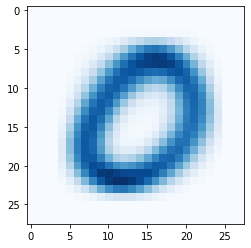

In [35]:
image = F_matrix1[0]
fig = plt.figure()
plt.imshow(image, cmap = 'Blues')
plt.show()

In [36]:
num = 10
images = F_matrix1[: num]
labels = F_matrix_y[: num]

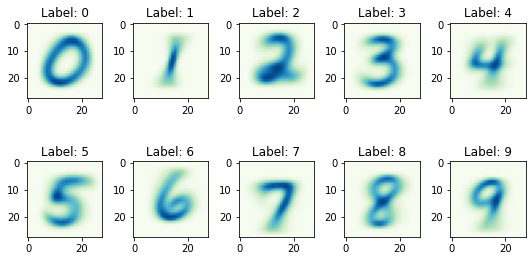

In [37]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize = (1.5*num_col, 2*num_row))
for i in range(num):
  ax = axes[i // num_col, i % num_col]
  ax.imshow(images[i], cmap = 'GnBu')
  ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()